In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
social_ad=pd.read_csv('Social_Network_Ads.csv')

In [3]:
social_ad.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
social_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [6]:
social_ad['User ID'].nunique()# it means all are unique does not play any role in feature colmn

400

In [7]:
social_ad.drop('User ID',axis=1,inplace=True)

In [8]:
social_ad.groupby('Gender').describe().T# it means actually 37 % females purchased and 33% males purchased

Gender                        Female           Male
Age             count     204.000000     196.000000
                mean       38.411765      36.867347
                std        10.859019      10.043636
                min        18.000000      18.000000
                25%        30.000000      29.000000
                50%        37.500000      36.500000
                75%        47.000000      42.000000
                max        60.000000      60.000000
EstimatedSalary count     204.000000     196.000000
                mean    71759.803922   67642.857143
                std     35595.236189   32421.819181
                min     15000.000000   15000.000000
                25%     44000.000000   43000.000000
                50%     70500.000000   68000.000000
                75%     90750.000000   86000.000000
                max    150000.000000  150000.000000
Purchased       count     204.000000     196.000000
                mean        0.377451       0.336735
                std         0.485942       0.473804
                min         0.000000       0.000000
                25%         0.000000       0.000000
                50%         0.000000       0.000000
                75%         1.000000       1.000000
                max         1.000000       1.000000

In [9]:
social_ad.groupby(['Gender','Purchased']).describe().T

Gender                        Female                          Male  \
Purchased                          0              1              0   
Age             count     127.000000      77.000000     130.000000   
                mean       33.110236      47.155844      32.484615   
                std         8.468643       8.463645       7.504246   
                min        18.000000      27.000000      18.000000   
                25%        27.000000      42.000000      26.000000   
                50%        33.000000      48.000000      34.500000   
                75%        39.000000      53.000000      38.000000   
                max        59.000000      60.000000      49.000000   
EstimatedSalary count     127.000000      77.000000     130.000000   
                mean    61480.314961   88714.285714   59630.769231   
                std     25248.243816   43123.097103   23504.292355   
                min     15000.000000   20000.000000   15000.000000   
                25%     44000.000000   41000.000000   43500.000000   
                50%     62000.000000   96000.000000   60500.000000   
                75%     79000.000000  130000.000000   76750.000000   
                max    134000.000000  150000.000000  141000.000000   

Gender                                
Purchased                          1  
Age             count      66.000000  
                mean       45.500000  
                std         8.762244  
                min        28.000000  
                25%        39.000000  
                50%        46.000000  
                75%        50.500000  
                max        60.000000  
EstimatedSalary count      66.000000  
                mean    83424.242424  
                std     40937.122745  
                min     20000.000000  
                25%     41250.000000  
                50%     87500.000000  
                75%    117750.000000  
                max    150000.000000

In [10]:
pd.get_dummies(social_ad['Gender'])

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [11]:
social_ad['Male']=pd.get_dummies(social_ad['Gender'],drop_first=True)
social_ad.drop('Gender',axis=1,inplace=True)

In [12]:
social_ad.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


<AxesSubplot:ylabel='Density'>

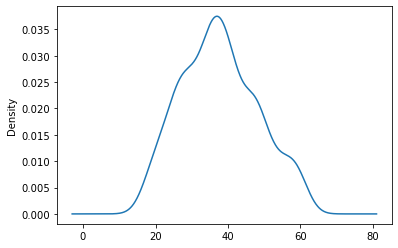

In [13]:

social_ad['Age'].plot.kde()

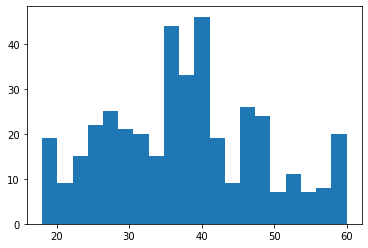

In [14]:
p=plt.hist(social_ad['Age'],bins=20)# age groupi sconsiderable but in age grp 30 to 45 it is more

<AxesSubplot:ylabel='Density'>

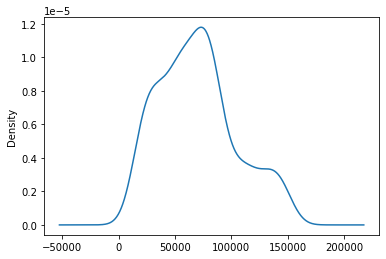

In [15]:
social_ad['EstimatedSalary'].plot.kde()

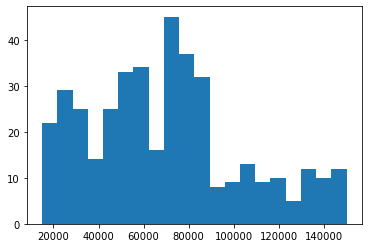

In [16]:
p1=plt.hist(social_ad['EstimatedSalary'],bins=20)# peak is coming around 70000

Text(0.5, 1.0, 'Purchased')

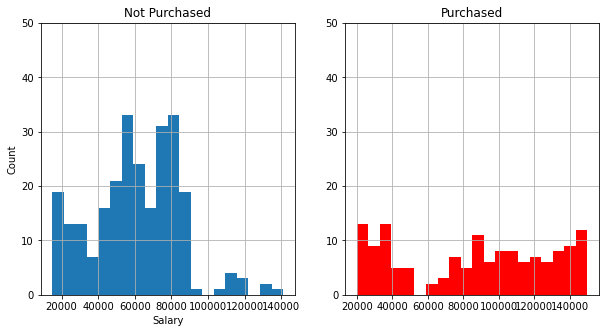

In [17]:
# segregating the two features
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
p1=plt.hist(social_ad[social_ad['Purchased']==0]['EstimatedSalary'],bins=20)# not purchased with salary
plt.grid()
plt.ylim(0,50)
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Not Purchased')
plt.subplot(1,2,2)
p1=plt.hist(social_ad[social_ad['Purchased']==1]['EstimatedSalary'],bins=20,color='r')# purchased with salary
plt.grid()
plt.ylim(0,50)
plt.title('Purchased')

Text(0.5, 1.0, 'Purchased')

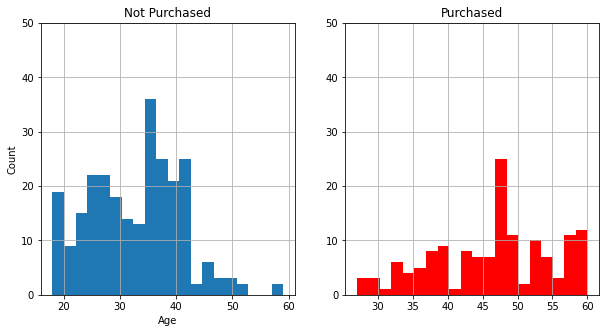

In [18]:
# segregating the two features
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
p1=plt.hist(social_ad[social_ad['Purchased']==0]['Age'],bins=20)# more age people more buy
plt.grid()
plt.ylim(0,50)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Not Purchased')
plt.subplot(1,2,2)
p1=plt.hist(social_ad[social_ad['Purchased']==1]['Age'],bins=20,color='r')# less age people does not buy
plt.grid()
plt.ylim(0,50)
plt.title('Purchased')

In [19]:
x=social_ad.drop('Purchased',axis=1)
y=social_ad['Purchased']

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=101)

In [21]:
model_dt=DecisionTreeClassifier().fit(xtrain,ytrain)

In [22]:
model_dt.score(xtest,ytest)# the percentage is floating

0.88

In [23]:
model_rf=RandomForestClassifier().fit(xtrain,ytrain)

In [24]:
model_rf.score(xtest,ytest)# percentage is fluctuating becoz of impurity

0.91

In [25]:
model_dt.classes_# it shows labels 0 and 1 purchased or not

array([0, 1], dtype=int64)

In [26]:
model_dt.feature_importances_# gives some values

array([0.51205996, 0.45752755, 0.03041249])

In [27]:
imp_dt=pd.DataFrame(model_dt.feature_importances_*100,index=x.columns,columns=['Feature_Importance'])# create df of feature importance
imp_dt# it means age is really important estimatedsalary is also imp for this dataset male is not so imp total is 100%

,Feature_Importance
Age,51.205996
EstimatedSalary,45.752755
Male,3.041249


In [28]:
imp_dt.sum()

Feature_Importance    100.0
dtype: float64

In [29]:
# now dropping male as well

In [30]:
x2=x.drop('Male',axis=1).copy()# becoz male does not have much impact its feature importance % is 2 
y2=y.copy()
xtrain2,xtest2,ytrain2,ytest2=train_test_split(x2,y2,test_size=0.25,random_state=101)
model_dt_2=DecisionTreeClassifier().fit(xtrain2,ytrain2)
print(round(model_dt_2.score(xtest2,ytest2)*100,2))
# no such improvement

86.0


In [31]:
model_dt_2.feature_importances_

array([0.52517567, 0.47482433])

In [32]:
model_rf.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'random_state',
 'ccp_alpha')

In [33]:
model_rf.estimators_# random forest creates lot of decision tress

[DecisionTreeClassifier(max_features='auto', random_state=33572838),
 DecisionTreeClassifier(max_features='auto', random_state=511510094),
 DecisionTreeClassifier(max_features='auto', random_state=236734940),
 DecisionTreeClassifier(max_features='auto', random_state=268853531),
 DecisionTreeClassifier(max_features='auto', random_state=651805836),
 DecisionTreeClassifier(max_features='auto', random_state=1418415592),
 DecisionTreeClassifier(max_features='auto', random_state=1868505061),
 DecisionTreeClassifier(max_features='auto', random_state=696007224),
 DecisionTreeClassifier(max_features='auto', random_state=852756734),
 DecisionTreeClassifier(max_features='auto', random_state=753059190),
 DecisionTreeClassifier(max_features='auto', random_state=769790893),
 DecisionTreeClassifier(max_features='auto', random_state=404370427),
 DecisionTreeClassifier(max_features='auto', random_state=1351927575),
 DecisionTreeClassifier(max_features='auto', random_state=1327501505),
 DecisionTreeClas

In [34]:
model_rf.feature_importances_*100#age=51 % and salary= 47% and male doen not have imapct

array([52.10873686, 46.90865902,  0.98260413])

In [35]:
model_rf_2=RandomForestClassifier().fit(xtrain2,ytrain2)
print(round(model_rf_2.score(xtest2,ytest2)*100,2))# not so much effect
model_rf_2.feature_importances_#this is the way to feature selection

90.0


array([0.52547044, 0.47452956])

In [36]:
# criterion default is gini and option is entropy
model_dt_3=DecisionTreeClassifier(criterion='entropy',random_state=101).fit(xtrain2,ytrain2)# some other parameters are there 
model_dt_3.score(xtest2,ytest2)*100# not so much infact decrese

86.0

In [37]:
model_rf_3=RandomForestClassifier(n_estimators=20).fit(xtrain2,ytrain2)
print(round(model_rf_2.score(xtest2,ytest2)*100,2))# not so much effect


90.0


In [38]:
scores=[]
for i in range(5,201,5):
    model_rf_3 = RandomForestClassifier(n_estimators=i,).fit(xtrain2,ytrain2)
    scores.append(round(model_rf_3.score(xtest2,ytest2)*100,2))# not so much effect


0

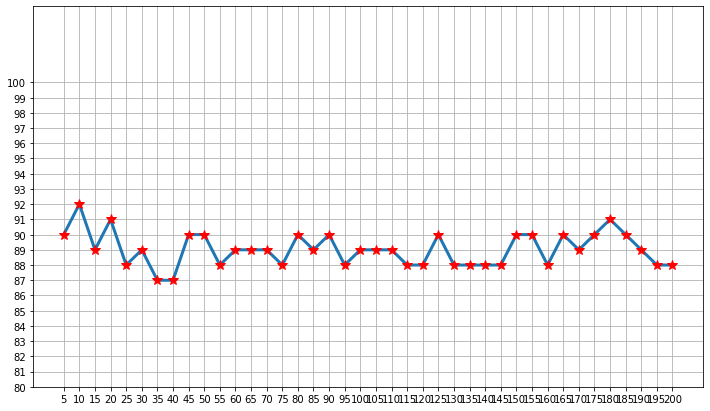

In [39]:
plt.figure(figsize=(12,7))
plt.plot(range(5,201,5),scores,lw=3,marker='*',markersize=10,markerfacecolor='r',markeredgecolor='r')
plt.grid()
plt.ylim([80,105])
plt.yticks(range(80,101,1))
plt.xticks(range(5,201,5))
0

In [41]:
criterion=['gini','entropy']
n_est=list(range(5,201,5))
min_splits=[2,4,6,8,10,14,18,20]
params={'n_estimators':n_est,'criterion':criterion,'min_samples_split':min_splits}


In [42]:
from sklearn.model_selection import GridSearchCV

In [44]:
g_model=GridSearchCV(RandomForestClassifier(),param_grid=params,verbose=3)
g_model.fit(xtrain2,ytrain2)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits
[CV 1/5] END criterion=gini, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_split=2, n_estimators=15; total time=   

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 4, 6, 8, 10, 14, 18, 20],
                         'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                                          55, 60, 65, 70, 75, 80, 85, 90, 95,
                                          100, 105, 110, 115, 120, 125, 130,
                                          135, 140, 145, 150, ...]},
             verbose=3)

In [45]:
g_model.best_estimator_

RandomForestClassifier(min_samples_split=18, n_estimators=50)

In [46]:
g_model.best_params_

{'criterion': 'gini', 'min_samples_split': 18, 'n_estimators': 50}

In [47]:
g_model.best_estimator_.score(xtest2,ytest2)

0.91

In [54]:
model_best_from_view=RandomForestClassifier(n_estimators=50,criterion='entropy',min_samples_split=18,).fit(xtrain2,ytrain2)

In [55]:
model_best_from_view.score(xtest2,ytest2)

0.91

In [56]:
model_best_from_view.score(xtrain2,ytrain2)

0.9233333333333333